# Training Data Exploratory

This script is used to interactively explore how to extract the training data. This entails choosing proper windows and correcting selection data (which triggers were pressed during experiment), i.e. parameters for ``extract_training_data``, ``correct_selections``, ``extract_window_times``. The helper functions are found in src/helpers.py.

My personal take-aways are stored in this script and used for 06_get_training_data.py.

In [1]:
import sys
import warnings
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import ipywidgets as widgets

# import costume functions
sys.path.append('../helpers')
from helpers import plot_windows, load_data, plot_selection_data, plot_trajectory, extract_training_data

2025-09-15 16:42:39.502297: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-09-15 16:42:39.502324: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-09-15 16:42:39.502343: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-09-15 16:42:39.507317: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
participants_info = [
    {'Participant': '01', 'Session': '01', 'Task': 'RotationTask'},
    {'Participant': '02', 'Session': '01', 'Task': 'RotationTask'},
    {'Participant': '03', 'Session': '01', 'Task': 'RotationTask'}
]

all_fs = [128]
h_freqs = [45, 100]

fs = all_fs[0]
h_freq = h_freqs[0]
ica = False

data = defaultdict(dict)
for info in participants_info:
    data[info['Participant']] = load_data(info, fs, h_freq, ica)

Opening raw data file /home/pablo/eeg_decoder_project/data/sub-01/preprocessed/128hz_1-45_eeg_ica-False.fif...
    Range : 0 ... 590712 =      0.000 ...  4614.938 secs
Ready.
Reading 0 ... 590712  =      0.000 ...  4614.938 secs...


/home/pablo/eeg_decoder_project/notebooks/../helpers/helpers.py:48: RuntimeWarning: This filename (/home/pablo/eeg_decoder_project/data/sub-01/preprocessed/128hz_1-45_eeg_ica-False.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(pre_dir / f"{fs}hz_1-{h_freq}_eeg_ica-{ica}.fif", preload=True)


Opening raw data file /home/pablo/eeg_decoder_project/data/sub-02/preprocessed/128hz_1-45_eeg_ica-False.fif...
    Range : 0 ... 593815 =      0.000 ...  4639.180 secs
Ready.
Reading 0 ... 593815  =      0.000 ...  4639.180 secs...


/home/pablo/eeg_decoder_project/notebooks/../helpers/helpers.py:48: RuntimeWarning: This filename (/home/pablo/eeg_decoder_project/data/sub-02/preprocessed/128hz_1-45_eeg_ica-False.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(pre_dir / f"{fs}hz_1-{h_freq}_eeg_ica-{ica}.fif", preload=True)


Opening raw data file /home/pablo/eeg_decoder_project/data/sub-03/preprocessed/128hz_1-45_eeg_ica-False.fif...
    Range : 0 ... 602965 =      0.000 ...  4710.664 secs
Ready.
Reading 0 ... 602965  =      0.000 ...  4710.664 secs...


/home/pablo/eeg_decoder_project/notebooks/../helpers/helpers.py:48: RuntimeWarning: This filename (/home/pablo/eeg_decoder_project/data/sub-03/preprocessed/128hz_1-45_eeg_ica-False.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  eeg = mne.io.read_raw_fif(pre_dir / f"{fs}hz_1-{h_freq}_eeg_ica-{ica}.fif", preload=True)


## Explore selected keys that could be wrong

In [3]:
warnings.simplefilter("ignore")

# widgets
id_options = list(data.keys())
id_selector = widgets.Dropdown(
    options=id_options,
    description='Participant:',
    style={'description_width': 'initial'}
)

trial_options = list(range(0, 150))
trial_selector = widgets.Dropdown(
    options=trial_options,
    description='Trial:',
    style={'description_width': 'initial'}
)

use_window_checkbox = widgets.Checkbox(
    value=False,
    description='Use Correction Window'
)

use_invalidate_checkbox = widgets.Checkbox(
    value=False,
    description='Omit Brief Checks (per trial)'
)

flag_checks_no_selection_false_checkbox = widgets.Checkbox(
    value=False,
    description='Flag No Selection But Checked False (Or Random)'
)

window_input = widgets.FloatText(
    value=0.25,
    description='Window (s):',
    step=0.01
)

min_time_input = widgets.FloatText(
    value=1.,
    description='Window (s):',
    step=0.5
)

widgets.interact(
    lambda id, trial, use_window, selection_window, omit_brief_fixations_per_trial, min_fixation_per_trial_ms, flag_no_decisions_false: plot_selection_data(
        data, id, trial, use_window, selection_window, omit_brief_fixations_per_trial, min_fixation_per_trial_ms, flag_no_decisions_false
    ),
    id=id_selector,
    trial=trial_selector,
    use_window=use_window_checkbox,
    selection_window=window_input,
    omit_brief_fixations_per_trial=use_invalidate_checkbox,
    min_fixation_per_trial_ms=min_time_input,
    flag_no_decisions_false=flag_checks_no_selection_false_checkbox
)
plt.close('all')  # close any existing figures

interactive(children=(Dropdown(description='Participant:', options=('01', '02', '03'), style=DescriptionStyle(…

In [4]:
# Time range slider (0.0 to 1.0 = 0% to 100% of trial duration)
time_slider = widgets.FloatRangeSlider(
    value=[0.0, 1.0],
    min=0.0, max=1.0, step=0.01,
    description='Time Range (normalized)',
    continuous_update=False,
    layout=widgets.Layout(width='60%'),
    style={'description_width': 'initial'},
)

# Link widgets
step_input = widgets.FloatText(
    value=30,
    description='Step:',
    step=10
)

widgets.interact(
    lambda id, trial, time_range, step: plot_trajectory(
        data, id, trial, time_range, step
    ),
    id=id_selector,
    trial=trial_selector,
    time_range=time_slider,
    step=step_input
)

interactive(children=(Dropdown(description='Participant:', options=('01', '02', '03'), style=DescriptionStyle(…

<function __main__.<lambda>(id, trial, time_range, step)>

### **Take-Away**

* ``use_window`` does not seem to be important
* ``selection_window`` of 250ms seems fine
* ``omit_brief_fixations_per_trial`` + `min_fixations_per_trial_ms` changes a lot -> literature for what threshold
* whether flagging no decisions random or always incorrect is debatable

## Synchronize EEG and eyetracker

In [5]:
id  = list(data.keys())[0]
mouse_log = data[id]['mouse_log'].copy()
onsets = data[id]['onsets'].copy()
triggers = data[id]['triggers'].copy()

starts_mne_onset = onsets[triggers == 'start']
starts_eyetrack = mouse_log[mouse_log['event'] == "START"]['timestamp']
start_diffs = starts_eyetrack - starts_mne_onset

which_diff = np.cumsum(mouse_log['event'] == 'START').values - 1
start_idx = np.where(which_diff == 0)[0][0]
which_diff = which_diff[which_diff != -1]

t_eyetracker = mouse_log['timestamp'].values[start_idx:]
diffs = start_diffs.values[which_diff]

mouse_log_synced = mouse_log[start_idx:].copy()
mouse_log_synced['mne_time_sync_each_start'] = t_eyetracker - diffs
mouse_log_synced['mne_time_sync_start'] = t_eyetracker - diffs[0]

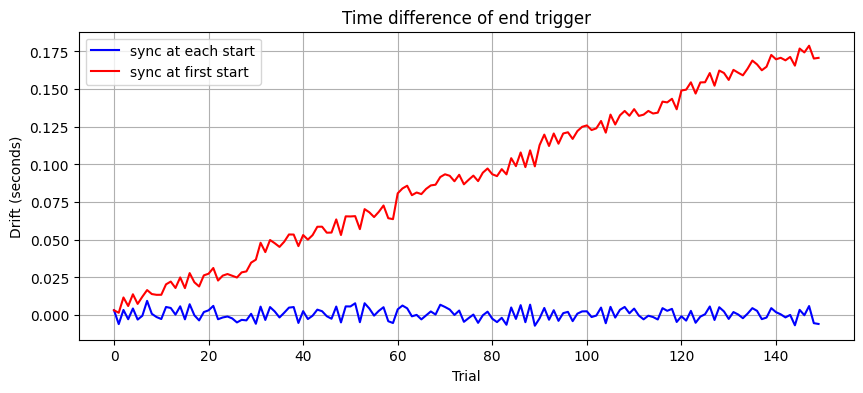

In [6]:
ends_mne_onset = onsets[triggers == 'end']
ends_eyetrack_sync_each_start = mouse_log_synced[mouse_log_synced['event'] == "END"]['mne_time_sync_each_start']
ends_eyetrack_sync_start = mouse_log_synced[mouse_log_synced['event'] == "END"]['mne_time_sync_start']

# lags
end_diffs_sync_each_start = ends_eyetrack_sync_each_start - ends_mne_onset
end_diffs_sync_start = ends_eyetrack_sync_start - ends_mne_onset

plt.figure(figsize=(10, 4))
plt.title('Time difference of end trigger')
plt.plot(end_diffs_sync_each_start.reset_index()['mne_time_sync_each_start'], label="sync at each start", color='blue')
plt.plot(end_diffs_sync_start.reset_index()['mne_time_sync_start'], label="sync at first start", color='red')
plt.xlabel("Trial")
plt.ylabel("Drift (seconds)")
plt.legend()
plt.grid(True)
plt.show()

### **Take-Away**

Start trigger time difference between eeg and eyetracker drift apart -> synchronize at each start of trial (blue)

## Extract training data

250ms window - 50ms shift - at start of fixation - min_duration?

In [7]:
id = list(data.keys())[1]
id

'02'

In [22]:
training_data, data_info = extract_training_data(
    data[id],
    target='decision',
    window_ms=500,
    step_ms=50,
    use_window=False,
    selection_window_ms=250,
    omit_brief_fixations_per_trial=False,
    min_fixation_per_trial_ms=2000,
    flag_no_decisions_false=False,
    min_fixation_ms=50
)


In [13]:
training_data[0].shape
print("X size (GB):", training_data[0].nbytes / 1e9)
print("y size (MB):", training_data[1].nbytes / 1e6)

X size (GB): 0.798223104
y size (MB): 0.197972


In [9]:
window_ms_input = widgets.FloatText(
    value=250,
    description='Window size (ms):',
    step=50
)

step_ms_input = widgets.FloatText(
    value=50,
    description='Offset (ms):',
    step=10
)

min_fixation_ms_input = widgets.FloatText(
    value=100,
    description='Min fixation time (ms):',
    step=10
)

widgets.interact(
    lambda id, trial, window_ms, step_ms, min_fixation_ms: plot_windows(
        data, id, trial, window_ms, step_ms, min_fixation_ms
    ),
    id=id_selector,
    trial=trial_selector,
    window_ms=window_ms_input,
    step_ms=step_ms_input,
    min_fixation_ms=min_fixation_ms_input
 )

interactive(children=(Dropdown(description='Participant:', options=('03',), style=DescriptionStyle(description…

<function __main__.<lambda>(id, trial, window_ms, step_ms, min_fixation_ms)>

### **Take-Away**

* Training data is quite big, how to save and load efficiently?
* Min fixations dont change a lot: at 100ms 2.5% is excluded

## Final Take-Away

* ``correct_selections``
    * use_window: 
        * Explanation: Corrects triggers that were pressed at end of trial
        * Suggestion: **True**
        * Importance: **Does not change much**
    * selection_window_ms: 
        * Explanation: Threshold for ``use_window``
        * Suggestion: **250ms** 
        * Importance: **Does not change much**
    * omit_brief_fixations_per_trial:
        * Explanation: Omit triggers, that were fixated briefly over the whole trial?
        * Suggestion: **True**
        * Importance: **Very, changes a lot**
    * min_fixation_per_trial_ms:
        * Explanation: Threshold for ``omit_brief_fixations_per_trial``, a proxy for looked at, but not thought about (literature?)
        * Suggestion: **1000ms**?
        * Importance: **Very, changes a lot**
    * flag_checks_no_selection_false:
        * Explanation: Flag as incorrect when ``omit_brief_fixations_per_trial``
        * Suggestion: **True**
        * Importance: **Very, changes a lot**

* ``extract_window_times``
    * window_s: 
        * Explanation: How long should each window be, proxy for processing time?
        * Suggestion: **250ms?**
        * Importance: **?**
    * step_s: 
        * Explanation: Offset for ``window_s``, why overlapping?
        * Suggestion: **50ms?** 
        * Importance: **?**
    * min_fixation_s: 
        * Explanation: How long does a fixation need to be? Proxy for processing
        * Suggestion: **100ms** 
        * Importance: **Does not change much**

**Final preprocessing decisions can be specified in 04_get_training_data.py.**